In [72]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# get data
df = pd.read_csv('IMDB-Movie-Data.csv')
df1 = df
df

,Rank,Title,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
0,1,Guardians of the Galaxy,"Action,Adventure,Sci-Fi",A group of intergalactic criminals are forced ...,James Gunn,"Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...",2014,121,8.1,757074,333.13,76.0
1,2,Prometheus,"Adventure,Mystery,Sci-Fi","Following clues to the origin of mankind, a te...",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fa...",2012,124,7.0,485820,126.46,65.0
2,3,Split,"Horror,Thriller",Three girls are kidnapped by a man with a diag...,M. Night Shyamalan,"James McAvoy, Anya Taylor-Joy, Haley Lu Richar...",2016,117,7.3,157606,138.12,62.0
3,4,Sing,"Animation,Comedy,Family","In a city of humanoid animals, a hustling thea...",Christophe Lourdelet,"Matthew McConaughey,Reese Witherspoon, Seth Ma...",2016,108,7.2,60545,270.32,59.0
4,5,Suicide Squad,"Action,Adventure,Fantasy",A secret government agency recruits some of th...,David Ayer,"Will Smith, Jared Leto, Margot Robbie, Viola D...",2016,123,6.2,393727,325.02,40.0
...,...,...,...,...,...,...,...,...,...,...,...,...
995,996,Secret in Their Eyes,"Crime,Drama,Mystery","A tight-knit team of rising investigators, alo...",Billy Ray,"Chiwetel Ejiofor, Nicole Kidman, Julia Roberts...",2015,111,6.2,27585,NaN,45.0
996,997,Hostel: Part II,Horror,Three American college students studying abroa...,Eli Roth,"Lauren German, Heather Matarazzo, Bijou Philli...",2007,94,5.5,73152,17.54,46.0
997,998,Step Up 2: The Streets,"Drama,Music,Romance",Romantic sparks occur between two dance studen...,Jon M. Chu,"Robert Hoffman, Briana Evigan, Cassie Ventura,...",2008,98,6.2,70699,58.01,50.0
998,999,Search Party,"Adventure,Comedy",A pair of friends embark on a mission to reuni...,Scot Armstrong,"Adam Pally, T.J. Miller, Thomas Middleditch,Sh...",2014,93,5.6,4881,NaN,22.0


In [37]:
# remove missing values
def rmv_df(dataset):

    dataset.dropna(inplace=True)
    dataset = dataset.reset_index(drop= True)

    # remove useless column(Rank)
    dataset = dataset.drop(["Runtime (Minutes)", "Votes", "Metascore", "Revenue (Millions)"], axis= 1) 
    # dataset['Rank'] = dataset['Rank'].apply(lambda x: x-1)
    dataset['Rank'] = dataset.index
    return dataset
df = rmv_df(df)
df

,Rank,Title,Genre,Description,Director,Actors,Year,Rating
0,0,Guardians of the Galaxy,"Action,Adventure,Sci-Fi",A group of intergalactic criminals are forced ...,James Gunn,"Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...",2014,8.1
1,1,Prometheus,"Adventure,Mystery,Sci-Fi","Following clues to the origin of mankind, a te...",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fa...",2012,7.0
2,2,Split,"Horror,Thriller",Three girls are kidnapped by a man with a diag...,M. Night Shyamalan,"James McAvoy, Anya Taylor-Joy, Haley Lu Richar...",2016,7.3
3,3,Sing,"Animation,Comedy,Family","In a city of humanoid animals, a hustling thea...",Christophe Lourdelet,"Matthew McConaughey,Reese Witherspoon, Seth Ma...",2016,7.2
4,4,Suicide Squad,"Action,Adventure,Fantasy",A secret government agency recruits some of th...,David Ayer,"Will Smith, Jared Leto, Margot Robbie, Viola D...",2016,6.2
...,...,...,...,...,...,...,...,...
833,833,Resident Evil: Afterlife,"Action,Adventure,Horror",While still out to destroy the evil Umbrella C...,Paul W.S. Anderson,"Milla Jovovich, Ali Larter, Wentworth Miller,K...",2010,5.9
834,834,Project X,Comedy,3 high school seniors throw a birthday party t...,Nima Nourizadeh,"Thomas Mann, Oliver Cooper, Jonathan Daniel Br...",2012,6.7
835,835,Hostel: Part II,Horror,Three American college students studying abroa...,Eli Roth,"Lauren German, Heather Matarazzo, Bijou Philli...",2007,5.5
836,836,Step Up 2: The Streets,"Drama,Music,Romance",Romantic sparks occur between two dance studen...,Jon M. Chu,"Robert Hoffman, Briana Evigan, Cassie Ventura,...",2008,6.2


In [38]:
def rate_class(dataset):
    # bins = [0, 6, 7.5, float('inf')]
    # labelz = [1,2,3]

    # # Create a new column 'Rating_Class' based on the specified bins and labels
    # dataset['Rating'] = pd.cut(dataset['Rating'], bins=bins, labels=labelz, right=False)

    # get labels
    labells = dataset['Rating']
    dataset = dataset.drop(['Rating'], axis= 1)
    return dataset, labells

df, labels = rate_class(df)


In [39]:
# from sklearn.model_selection import train_test_split

# X_train, X_test, y_train, y_test = train_test_split(df, labels, test_size= 0.2)

In [40]:
# def reset_indexing(X, y):
#     train = X.join(y)
#     train.reset_index(drop= True, inplace= True)
#     X = train.drop(['Rating'], axis= 1)
#     y = pd.Series(train['Rating'])
#     return X, y

# X_train, y_train = reset_indexing(X_train, y_train)

# X_train

In [41]:
from sklearn.preprocessing import StandardScaler

def standardized(dataset):
    stand = StandardScaler().fit_transform(dataset)
    stand_t = pd.DataFrame(stand, columns=dataset.columns)
    return stand_t

In [42]:
# dealing with catagorical data

df['Title'] = df['Title'].str.replace(r'\(\d{4}\)', '').str.rstrip()

In [43]:
# Split and binarize the genres
from sklearn.preprocessing import MultiLabelBinarizer

def preprocess_dataframe(df, col):
    if col == 'Year' or col == "Year":
        df['genres_split'] = df[col]
    else:
        df['genres_split'] = df[col].str.strip().str.split(", |,| ,| , ",)
        df[col] = df[col].str.strip().replace(', |,| ,| , ', " ")

    

    mlb = MultiLabelBinarizer()
    genres_df = pd.DataFrame(mlb.fit_transform(df.pop('genres_split')), columns=mlb.classes_)

    genre_list = []
    for i in genres_df.columns:
        genre_list.append(i)
    # df = df.join(genres_df)
    return df, genres_df, genre_list
    

In [44]:
df_processed, genres_df_processed, genre_list = preprocess_dataframe(df.copy(),'Genre')
df_processed, actors_df_processed, actors_list = preprocess_dataframe(df_processed.copy(),'Actors')
df_processed, director_df_processed, director_list = preprocess_dataframe(df_processed.copy(),'Director')

print("Unique values in year:", len(df_processed['Year'].unique()))
print(df_processed['Year'].unique())

print("Unique values in genres:", len(genres_df_processed.columns))
print(genres_df_processed.columns)

print("Unique values in Actors:", len(actors_df_processed.columns))
print(actors_df_processed.columns)

print("Unique values in Director:", len(director_df_processed.columns))
print(director_df_processed.columns)

Unique values in year: 11
[2014 2012 2016 2011 2015 2008 2006 2007 2009 2010 2013]
Unique values in genres: 20
Index(['Action', 'Adventure', 'Animation', 'Biography', 'Comedy', 'Crime',
       'Drama', 'Family', 'Fantasy', 'History', 'Horror', 'Music', 'Musical',
       'Mystery', 'Romance', 'Sci-Fi', 'Sport', 'Thriller', 'War', 'Western'],
      dtype='object')
Unique values in Actors: 1638
Index(['50 Cent', 'AJ Michalka', 'Aamir Khan', 'Aaron Burns', 'Aaron Eckhart',
       'Aaron Paul', 'Aaron Poole', 'Aaron Taylor-Johnson', 'Aaron Yoo',
       'Aasif Mandvi',
       ...
       'Zachary Levi', 'Zachary Quinto', 'Zachery Ty Bryan', 'Zoe Kazan',
       'Zoe Saldana', 'Zoey Deutch', 'Zooey Deschanel', 'Zoë Kravitz',
       'Ólafur Darri Ólafsson', 'Óscar Jaenada'],
      dtype='object', length=1638)
Unique values in Director: 524
Index(['Aamir Khan', 'Abdellatif Kechiche', 'Adam McKay', 'Adam Shankman',
       'Adam Wingard', 'Akiva Schaffer', 'Alan Taylor', 'Albert Hughes',
       'Al

In [45]:
import seaborn as sns


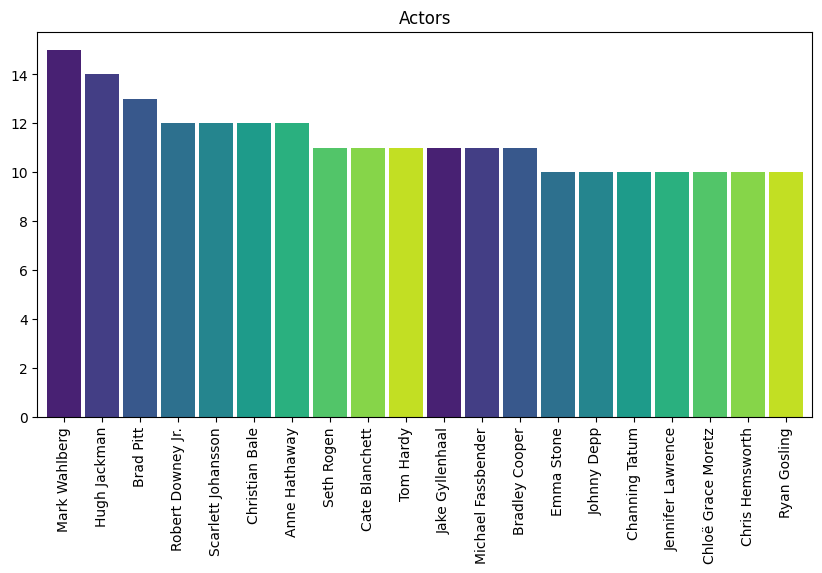

In [46]:
def visualize_distribution(cata_df, name, n =20):
    plt.figure(figsize=(10,5))
    list1=[]
    if name == 'Year' or name == "Year":
        for i in cata_df[name]:
            list1.append(i)
    else: 
        for i in cata_df[name].str.split(', |,| ,| , '):
            list1.extend(i)

    
    pd.Series(list1).value_counts()[:n].sort_values(ascending=False).plot.bar(width=0.9,color=sns.color_palette('viridis',10))
    plt.title(f'{name}')
    plt.show()
    

visualize_distribution(df_processed, "Actors")

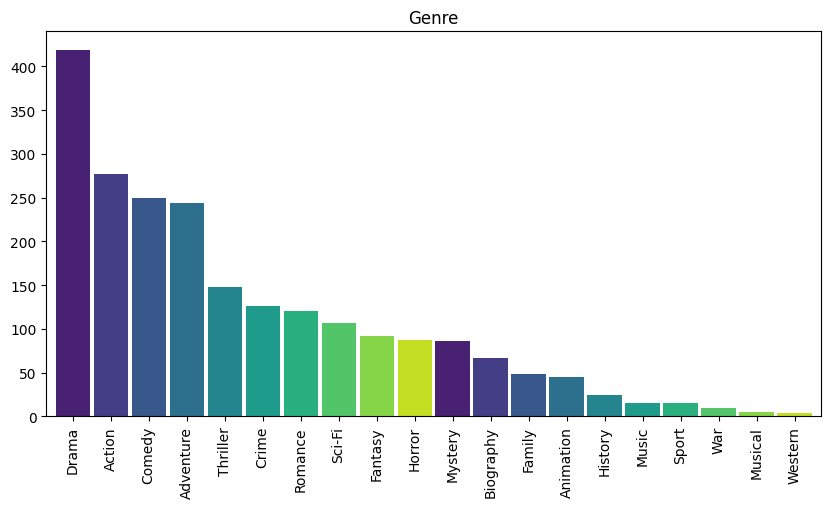

In [47]:
visualize_distribution(df_processed, "Genre", len(genre_list))

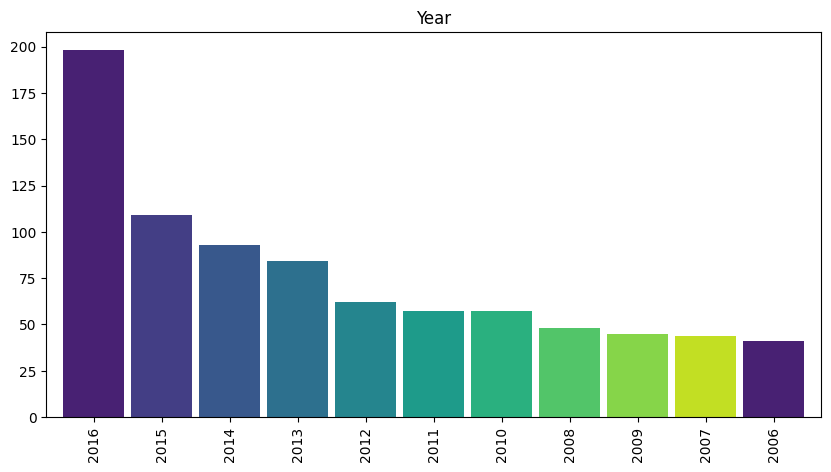

In [48]:
visualize_distribution(df_processed, "Year", len(df_processed['Year'].unique()))

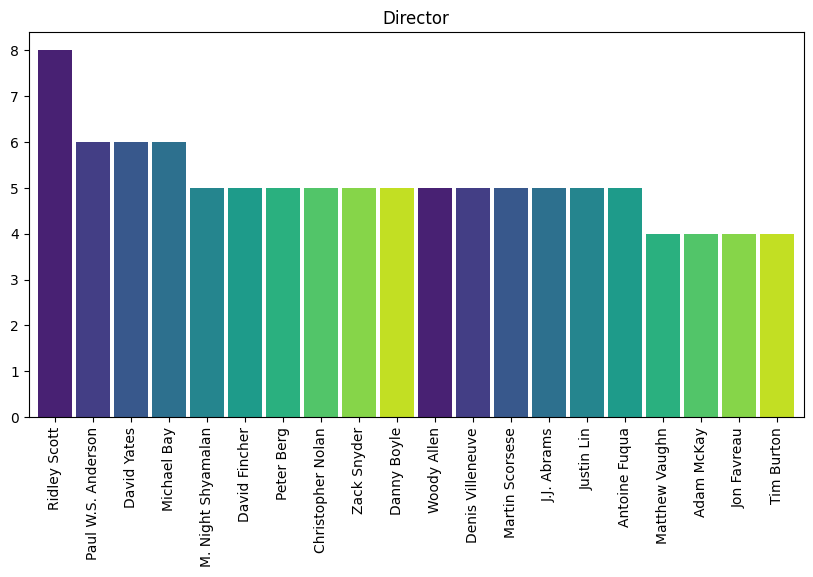

In [49]:
visualize_distribution(df_processed, 'Director')

In [50]:
def binary(col, col_list):
    binaryList = []
    for genre in col_list:
        if genre in col:
            binaryList.append(1)
        else:
            binaryList.append(0)
    return binaryList


def encoding(dataset, col, col_list):
    
    dataset[f'{col}_bin'] = dataset[col].apply(lambda x: binary(x, col_list))
    return dataset

# encoding(df_processed, 'Genre', genre_list)
# encoding(df_processed, 'Actors', actors_list)
# encoding(df_processed, 'Director', director_list)

df_processed


,Rank,Title,Genre,Description,Director,Actors,Year
0,0,Guardians of the Galaxy,"Action,Adventure,Sci-Fi",A group of intergalactic criminals are forced ...,James Gunn,"Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...",2014
1,1,Prometheus,"Adventure,Mystery,Sci-Fi","Following clues to the origin of mankind, a te...",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fa...",2012
2,2,Split,"Horror,Thriller",Three girls are kidnapped by a man with a diag...,M. Night Shyamalan,"James McAvoy, Anya Taylor-Joy, Haley Lu Richar...",2016
3,3,Sing,"Animation,Comedy,Family","In a city of humanoid animals, a hustling thea...",Christophe Lourdelet,"Matthew McConaughey,Reese Witherspoon, Seth Ma...",2016
4,4,Suicide Squad,"Action,Adventure,Fantasy",A secret government agency recruits some of th...,David Ayer,"Will Smith, Jared Leto, Margot Robbie, Viola D...",2016
...,...,...,...,...,...,...,...
833,833,Resident Evil: Afterlife,"Action,Adventure,Horror",While still out to destroy the evil Umbrella C...,Paul W.S. Anderson,"Milla Jovovich, Ali Larter, Wentworth Miller,K...",2010
834,834,Project X,Comedy,3 high school seniors throw a birthday party t...,Nima Nourizadeh,"Thomas Mann, Oliver Cooper, Jonathan Daniel Br...",2012
835,835,Hostel: Part II,Horror,Three American college students studying abroa...,Eli Roth,"Lauren German, Heather Matarazzo, Bijou Philli...",2007
836,836,Step Up 2: The Streets,"Drama,Music,Romance",Romantic sparks occur between two dance studen...,Jon M. Chu,"Robert Hoffman, Briana Evigan, Cassie Ventura,...",2008


In [51]:
# title and description
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import nltk

ps = WordNetLemmatizer()


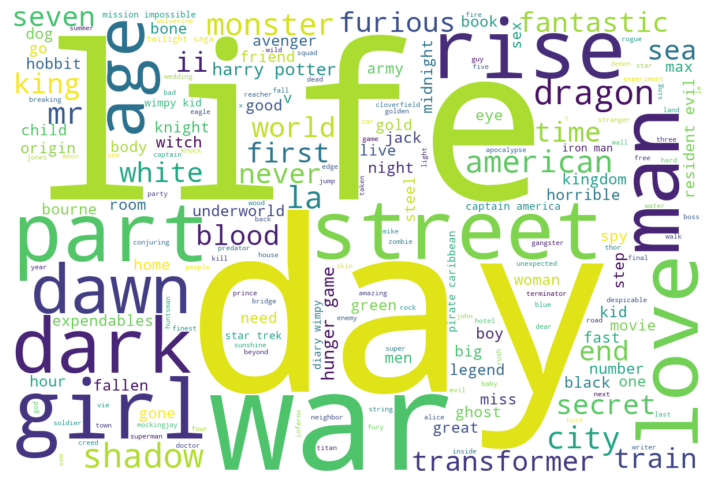

In [52]:
from wordcloud import WordCloud
from nltk.tokenize import TweetTokenizer
tweet_tokenizer = TweetTokenizer()

def clean_text(text):
    words = tweet_tokenizer.tokenize(text)
    words = [ps.lemmatize(word.lower().replace(', |,| ,| , ', ' ')) for word in words if word.isalpha() and word.lower() not in stopwords.words('english')]
    return ' '.join(words)

def generate_wordcloud(dataset, col, n = 1):
    wordcloud = WordCloud(width=1200, height=800, background_color="white").generate(clean_text(' '.join(dataset[col])))
    if n == 1:
        plt.figure(figsize=(10, 6))
        plt.imshow(wordcloud, interpolation='bilinear')
        plt.axis("off")
        plt.show()

# Generate wordcloud
generate_wordcloud(df_processed, 'Title')

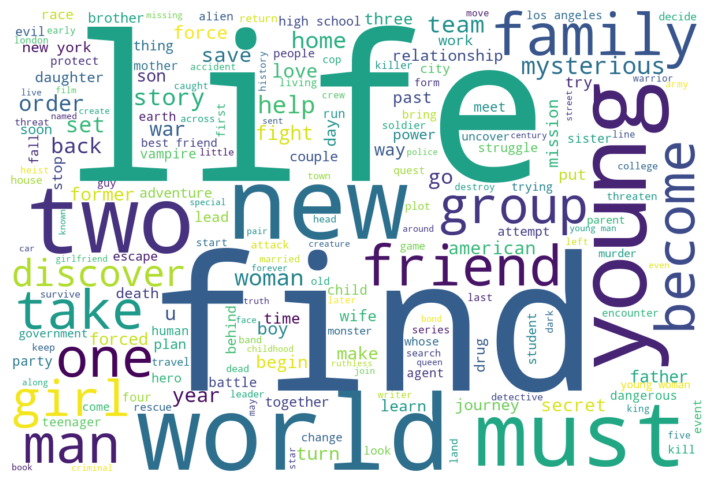

In [53]:
generate_wordcloud(df_processed, 'Description')

In [54]:
def preprocess_txt_dataframe(df, col):
    df['genres_split'] = df[col].str.strip().str.split(" ",)
    df[col] = df[col].str.strip().replace(' ', " ")

    

    mlb = MultiLabelBinarizer()
    genres_df = pd.DataFrame(mlb.fit_transform(df.pop('genres_split')), columns=mlb.classes_)

    genre_list = []
    for i in genres_df.columns:
        genre_list.append(i)
    # df = df.join(genres_df)
    return df, genres_df, genre_list

def encoding(dataset, col, col_list):
    
    dataset[f'{col}_bin'] = dataset[col].apply(lambda x: binary(x, col_list))
    return dataset


In [55]:
df_processed, title_df_processed, title_list = preprocess_txt_dataframe(df_processed.copy(),'Title')
df_processed, des_df_processed, des_list = preprocess_txt_dataframe(df_processed.copy(),'Description')
encoding(df_processed, 'Title',title_list)
encoding(df_processed, 'Description', des_list)

df_processed

,Rank,Title,Genre,Description,Director,Actors,Year,Title_bin,Description_bin
0,0,Guardians of the Galaxy,"Action,Adventure,Sci-Fi",A group of intergalactic criminals are forced ...,James Gunn,"Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...",2014,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
1,1,Prometheus,"Adventure,Mystery,Sci-Fi","Following clues to the origin of mankind, a te...",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fa...",2012,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
2,2,Split,"Horror,Thriller",Three girls are kidnapped by a man with a diag...,M. Night Shyamalan,"James McAvoy, Anya Taylor-Joy, Haley Lu Richar...",2016,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
3,3,Sing,"Animation,Comedy,Family","In a city of humanoid animals, a hustling thea...",Christophe Lourdelet,"Matthew McConaughey,Reese Witherspoon, Seth Ma...",2016,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
4,4,Suicide Squad,"Action,Adventure,Fantasy",A secret government agency recruits some of th...,David Ayer,"Will Smith, Jared Leto, Margot Robbie, Viola D...",2016,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
...,...,...,...,...,...,...,...,...,...
833,833,Resident Evil: Afterlife,"Action,Adventure,Horror",While still out to destroy the evil Umbrella C...,Paul W.S. Anderson,"Milla Jovovich, Ali Larter, Wentworth Miller,K...",2010,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
834,834,Project X,Comedy,3 high school seniors throw a birthday party t...,Nima Nourizadeh,"Thomas Mann, Oliver Cooper, Jonathan Daniel Br...",2012,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
835,835,Hostel: Part II,Horror,Three American college students studying abroa...,Eli Roth,"Lauren German, Heather Matarazzo, Bijou Philli...",2007,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
836,836,Step Up 2: The Streets,"Drama,Music,Romance",Romantic sparks occur between two dance studen...,Jon M. Chu,"Robert Hoffman, Briana Evigan, Cassie Ventura,...",2008,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."


In [56]:
from scipy import spatial
def Similarity(dataset, movieId1, movieId2):
    a = dataset.loc[dataset['Rank'] == movieId1].squeeze()
    b = dataset.loc[dataset['Rank'] == movieId2].squeeze()
    # print(a)
    # print(b)
    
    genresA = a['Genre_bin']
    genresB = b['Genre_bin']
    
    genreDistance = spatial.distance.cosine(genresA, genresB)
    
    scoreA = a['Actors_bin']
    scoreB = b['Actors_bin']
    scoreDistance = spatial.distance.cosine(scoreA, scoreB)
    
    directA = a['Director_bin']
    directB = b['Director_bin']
    directDistance = spatial.distance.cosine(directA, directB)
    
    wordsA_t = a['Title_bin']
    wordsB_t = b['Title_bin']
    wordsDistance_t = spatial.distance.cosine(wordsA_t, wordsB_t)

    wordsA = a['Description_bin']
    wordsB = b['Description_bin']
    wordsDistance = spatial.distance.cosine(wordsA, wordsB)
    return genreDistance + directDistance + scoreDistance + wordsDistance + wordsDistance_t
    # return genreDistance + directDistance + scoreDistance




In [57]:
# Similarity(df_processed, 0, 4)

# df_processed.loc[df_processed['Rank'] == 888].squeeze()
# type(df_processed.iloc[9])

In [58]:
import operator
def predict_score(movies, input_name):
    name = input_name
    new_movie = movies[movies['Title'].str.contains(name)].iloc[0].to_frame().T
    print('Selected Movie: ',new_movie['Title'].values[0])

    def getNeighbors(baseMovie, K):
        distances = []

        for index, movie in movies.iterrows():
            if movie['Rank'] != baseMovie['Rank'].values[0]:
                dist = Similarity(movies, baseMovie['Rank'].values[0], movie['Rank'])
                distances.append((movie['Rank'], dist))

        distances.sort(key=operator.itemgetter(1))
        neighbors = []

        for x in range(K):
            neighbors.append(distances[x])
        return neighbors

    K = 10
    avgRating = 0
    neighbors = getNeighbors(new_movie, K)
    print('\nRecommended Movies: \n')
    for neighbor in neighbors:
        avgRating = avgRating + labels.iloc[neighbor[0]] 
        print( movies.iloc[neighbor[0]][1]+" | Genres: "+str(movies.iloc[neighbor[0]][2]).strip('[]').replace(' ','')+" | Rating: "+str(labels.iloc[neighbor[0]]))

    print('\n')
    avgRating = avgRating/K
    print('The predicted rating for %s is: %f' %(new_movie['Title'].values[0],avgRating))
    print('The actual rating for %s is %f' %(new_movie['Title'].values[0],labels.iloc[new_movie['Rank']]))

In [59]:
# predict_score(df_processed, "Harry")

In [65]:
def fuck_data(dataset):
    # remove missing value
    dataset = rmv_df(dataset)

    # seperate ratings
    dataset, labels = rate_class(dataset)

    dataset['Title'] = dataset['Title'].str.replace(r'\(\d{4}\)', '').str.rstrip()
    
    # process cata data
    df_processed, genres_df_processed, genre_list = preprocess_dataframe(dataset.copy(),'Genre')
    df_processed, actors_df_processed, actors_list = preprocess_dataframe(df_processed.copy(),'Actors')
    df_processed, director_df_processed, director_list = preprocess_dataframe(df_processed.copy(),'Director')
    # df_processed, year_df_processed, year_list = preprocess_dataframe(df_processed.copy(),'Year')

    encoding(df_processed, 'Genre', genre_list)
    encoding(df_processed, 'Actors', actors_list)
    encoding(df_processed, 'Director', director_list)
    # encoding(df_processed, 'Year', year_list)

    # title, description
    generate_wordcloud(df_processed, 'Title', 0)
    generate_wordcloud(df_processed, 'Description', 0)

    df_processed, title_df_processed, title_list = preprocess_txt_dataframe(df_processed.copy(),'Title')
    df_processed, des_df_processed, des_list = preprocess_txt_dataframe(df_processed.copy(),'Description')
    encoding(df_processed, 'Title',title_list)
    encoding(df_processed, 'Description', des_list)
    
    return df_processed, labels, genres_df_processed
    # predict_score(df_processed, "Harry")

runback = pd.read_csv('IMDB-Movie-Data.csv')

runback ,labels,  data = fuck_data(runback)

    
    

In [74]:
labels

0      8.1
1      7.0
2      7.3
3      7.2
4      6.2
      ... 
833    5.9
834    6.7
835    5.5
836    6.2
837    5.3
Name: Rating, Length: 838, dtype: float64

In [76]:
data = pd.concat([data, labels], axis=1)
data

,Action,Adventure,Animation,Biography,Comedy,Crime,Drama,Family,Fantasy,History,...,Music,Musical,Mystery,Romance,Sci-Fi,Sport,Thriller,War,Western,Rating
0,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,8.1
1,0,1,0,0,0,0,0,0,0,0,...,0,0,1,0,1,0,0,0,0,7.0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,7.3
3,0,0,1,0,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,7.2
4,1,1,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,6.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
833,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,5.9
834,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,6.7
835,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,5.5
836,0,0,0,0,0,0,1,0,0,0,...,1,0,0,1,0,0,0,0,0,6.2


In [63]:
runback

,Rank,Title,Genre,Description,Director,Actors,Year,Genre_bin,Actors_bin,Director_bin,Title_bin,Description_bin
0,0,Guardians of the Galaxy,"Action,Adventure,Sci-Fi",A group of intergalactic criminals are forced ...,James Gunn,"Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...",2014,"[1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
1,1,Prometheus,"Adventure,Mystery,Sci-Fi","Following clues to the origin of mankind, a te...",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fa...",2012,"[0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
2,2,Split,"Horror,Thriller",Three girls are kidnapped by a man with a diag...,M. Night Shyamalan,"James McAvoy, Anya Taylor-Joy, Haley Lu Richar...",2016,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
3,3,Sing,"Animation,Comedy,Family","In a city of humanoid animals, a hustling thea...",Christophe Lourdelet,"Matthew McConaughey,Reese Witherspoon, Seth Ma...",2016,"[0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
4,4,Suicide Squad,"Action,Adventure,Fantasy",A secret government agency recruits some of th...,David Ayer,"Will Smith, Jared Leto, Margot Robbie, Viola D...",2016,"[1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
...,...,...,...,...,...,...,...,...,...,...,...,...
833,833,Resident Evil: Afterlife,"Action,Adventure,Horror",While still out to destroy the evil Umbrella C...,Paul W.S. Anderson,"Milla Jovovich, Ali Larter, Wentworth Miller,K...",2010,"[1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
834,834,Project X,Comedy,3 high school seniors throw a birthday party t...,Nima Nourizadeh,"Thomas Mann, Oliver Cooper, Jonathan Daniel Br...",2012,"[0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
835,835,Hostel: Part II,Horror,Three American college students studying abroa...,Eli Roth,"Lauren German, Heather Matarazzo, Bijou Philli...",2007,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
836,836,Step Up 2: The Streets,"Drama,Music,Romance",Romantic sparks occur between two dance studen...,Jon M. Chu,"Robert Hoffman, Briana Evigan, Cassie Ventura,...",2008,"[0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."


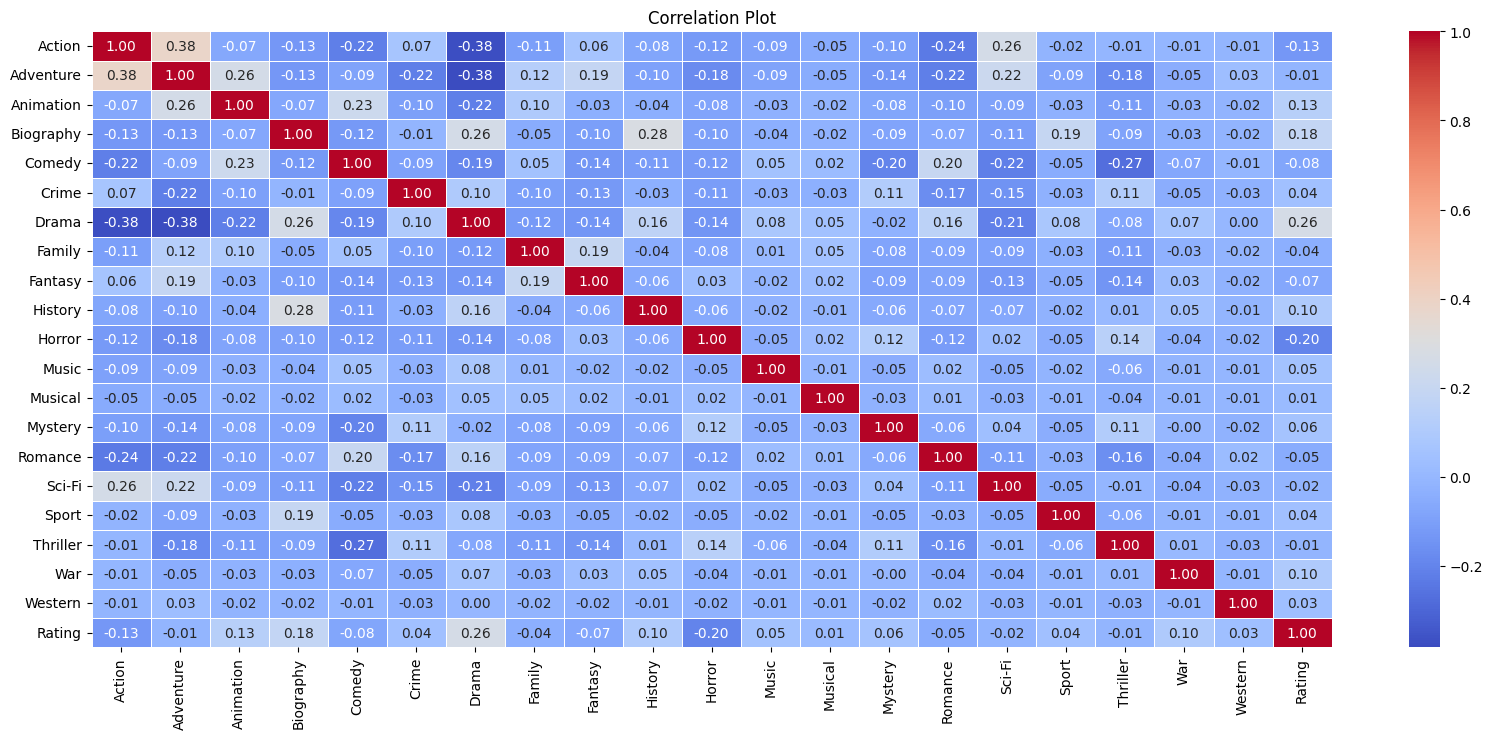

In [79]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
df = pd.DataFrame(data)

# Compute the correlation matrix
correlation_matrix = df.corr()

# Set up the matplotlib figure
plt.figure(figsize=(20, 8))

# Draw the correlation plot using seaborn's heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5)

# Show the plot
plt.title('Correlation Plot')
plt.show()